In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [17]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0


In [18]:
print(y_train)
y_train, y_test = y_train.flatten(), y_test.flatten()
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[6 9 9 ... 9 1 1]


In [19]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [20]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [21]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 37s 4ms/step - loss: 1.5624 - accuracy: 0.4232 - val_loss: 1.2438 - val_accuracy: 0.5413
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2700 - accuracy: 0.5440 - val_loss: 1.0826 - val_accuracy: 0.6096
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1357 - accuracy: 0.5932 - val_loss: 1.0639 - val_accuracy: 0.6162
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0422 - accuracy: 0.6294 - val_loss: 0.9640 - val_accuracy: 0.6668
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9677 - accuracy: 0.6567 - val_loss: 0.9416 - val_accuracy: 0.6661
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9123 - accuracy: 0.6761 - val_loss: 0.9080 - val_accuracy: 0.6804
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8610 - accuracy: 0.6940 - val_loss: 0.8852 - val_accuracy

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              118067

In [25]:
# getting info
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

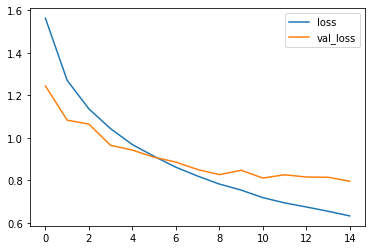

In [26]:
# Plot loss per iteration
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

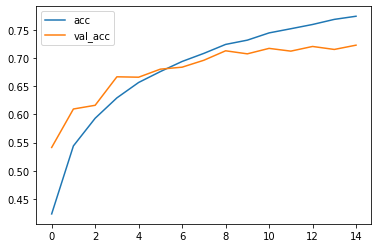

In [27]:
# Plot accuracy per iteration
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[740  26  26  32  16   9  14   6  87  44]
 [  6 868   2   9   6   5  10   2  19  73]
 [ 67   5 506  86 122  94  85  13  15   7]
 [ 14   4  32 562  67 213  71  15   9  13]
 [ 17   3  35  62 744  45  52  28  11   3]
 [  9   4  18 183  63 653  35  20  10   5]
 [  4   7  15  69  34  29 828   2   8   4]
 [ 11   2  18  66  90  80  10 701   5  17]
 [ 44  35   3  23   5  11   8   1 845  25]
 [ 20 102   8  23   8  15   4  12  25 783]]


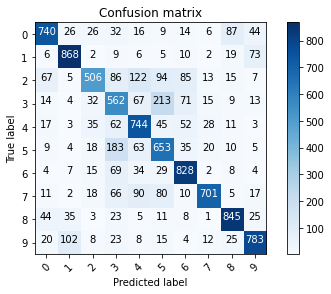

In [28]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [29]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

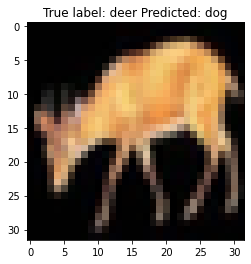

In [42]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));